In [1]:
library(data.table)
library(cowplot)
library(ggpubr)
library(Matrix)
library(BuenColors)
library(RColorBrewer)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:cowplot’:

    get_legend

Loading required package: MASS


#### define functions

In [2]:
plot_umap <- function(df_umap,labels,title='UMAP',colormap=colormap){
    set.seed(2019) 
    df_umap = data.frame(cbind(df_umap,labels),stringsAsFactors = FALSE)
    colnames(df_umap) = c('umap1','umap2','celltype')
    df_umap$umap1 = as.numeric(df_umap$umap1)
    df_umap$umap2 = as.numeric(df_umap$umap2)
    options(repr.plot.width=4, repr.plot.height=4)
    p <- ggplot(shuf(df_umap), aes(x = umap1, y = umap2, color = celltype)) +
      geom_point(size = 1) + scale_color_manual(values = colormap) +
      ggtitle(title)
    return(p)
}

### Input

In [3]:
workdir = './output/'
path_fig = paste0(workdir,'figures/')
system(paste0('mkdir -p ',path_fig))

In [4]:
path_umap = paste0(workdir,'umap_rds/')

In [5]:
metadata <- read.table('./input/metadata.tsv',
                         header = TRUE,
                         stringsAsFactors=FALSE,quote="",row.names=1)
metadata$label = as.character(metadata$label)

In [6]:
for (df in sapply(strsplit(list.files(path_umap), "\\."),'[',1)){
  assign(df,readRDS(paste0(path_umap,df,'.rds')))
}

In [7]:
ls()

[1] "df"               "df_umap_SnapATAC" "metadata"         "path_fig"        
[5] "path_umap"        "plot_umap"        "workdir"

In [8]:
labels = metadata$label

num_colors = length(unique(metadata$label))
colormap = colorRampPalette(brewer.pal(8, "Dark2"))(num_colors)
names(colormap) = unique(metadata$label)

### SnapATAC

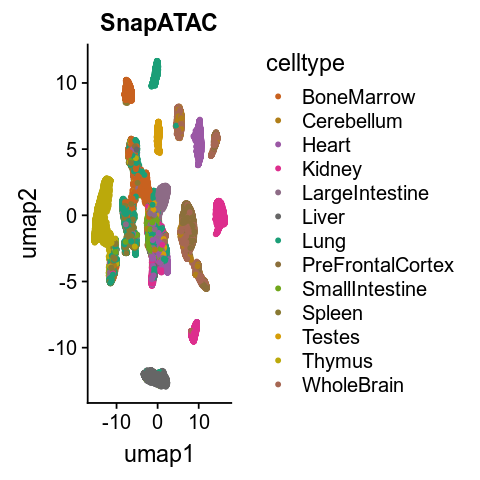

In [9]:
p_SnapATAC <- plot_umap(df_umap_SnapATAC,labels = labels,colormap = colormap,title='SnapATAC')
p_SnapATAC

In [10]:
figname = "cusanovich2018.pdf"
fig_width = 4*2
fig_height = 4*1

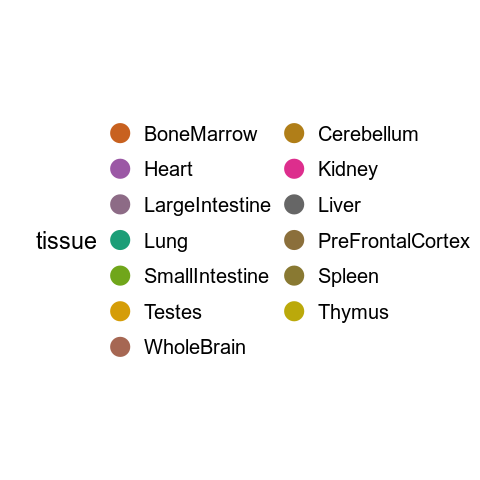

In [12]:
options(repr.plot.width=4, repr.plot.height=4)
leg <- cowplot::get_legend(p_SnapATAC + theme(legend.direction = "horizontal", legend.position = c(0.05,0.5)) + 
                           labs(color='tissue')+
                           guides(color=guide_legend(nrow=7,byrow=TRUE,override.aes = list(size=5))))

p_legend = as_ggplot(leg)
p_legend

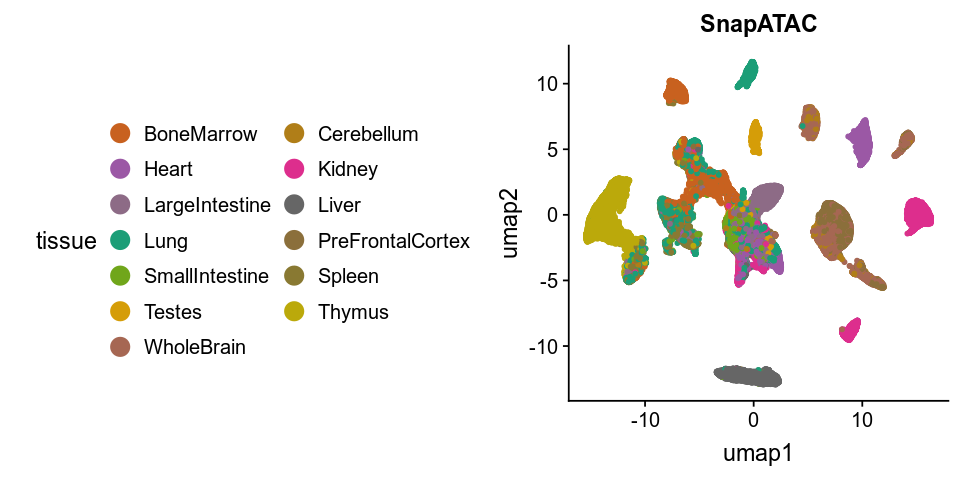

In [13]:
options(repr.plot.width=fig_width, repr.plot.height=fig_height)
p_figure = cowplot::plot_grid(p_legend,
                   p_SnapATAC+theme(legend.position = "none"), 
                   labels = "",ncol = 2)
p_figure

In [14]:
cowplot::ggsave(p_figure,filename = paste0(path_fig,figname), width = fig_width, height = fig_height)